# Ballistic trajectory - Kastparabel

## with and without friction

Philipp Schlatter, February 2022

Some preliminaries:

In [6]:
%matplotlib notebook

import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [7]:
g = 9.82
t = np.linspace(0,15,1000)

We consider the ballistic trajectory without air resistance $\vec r_p(t)$ and with a simple model for air resitance $\vec r_f(t)$ where the drag is assumed to be proportional to the velocity. Let us assume an initial velocity 
$$\vec v_0 = \begin{pmatrix} v_0\cos\alpha\\ v_0\sin\alpha \end{pmatrix}$$
in the origin of a Cartesian coordinate system $(x,y)$.

## Without friction

The acceleration of the ball (particle) is
$$ \vec a_p=\begin{pmatrix}  \ddot{x}\\   \ddot{y} \end{pmatrix}  =  \begin{pmatrix} 0\\  -g \end{pmatrix}  \ .$$ 
Integrating once, we obtain the velocity vector using the initial conditons,
$$\vec v_p = \begin{pmatrix} v_0\cos\alpha \\ v_0\sin\alpha - gt \end{pmatrix} \, $$
and a second time
$$\vec r_p = \begin{pmatrix}
t\,v_0\cos\alpha\\ t\,v_0\sin\alpha-\frac{1}{2}\,g\,t^2
\end{pmatrix} \ .$$


## With friction

We assume a simple model for the deceleration due to the drag force in the surrounding fluid, i.e. negatively proportional to the velocity.
$$\vec{a}_f = \begin{pmatrix} \ddot{x} \\ \ddot{y} \end{pmatrix} = \begin{pmatrix}  -\lambda \dot{x} \\  - \lambda \dot{y} - g \end{pmatrix}. $$
Integrating  together with the initial conditions, we obtain:
$$\vec v_f= \begin{pmatrix} v_0 \cos\left ( \alpha \right ) e^{-\lambda t}  \\ \left(v_0 \sin\left ( \alpha \right )+\frac{g}{\lambda}\right) e^{-\lambda t}- \frac{g}{\lambda}\end{pmatrix}$$
and 
$$\vec r_f =   
\begin{pmatrix}\frac{v_{0}  \cos\left ( \alpha \right )}{\lambda}\left [ 1 - e^{-\lambda t} \right ]\\
\frac{g + \lambda v_0 \sin\left ( \alpha \right )}{\lambda^{2} } \left [ 1 - e^{-\lambda t}  \right ] - \frac{g t}{\lambda} 
\end{pmatrix} \ .$$

In [8]:
# trajectory
p_x_ = lambda v_0, alpha, t: v_0*np.cos(alpha)*t
p_y_ = lambda v_0, alpha, t:-0.5*g*t**2+v_0*np.sin(alpha)*t 

p_ = lambda v_0, alpha, t: (v_0*np.cos(alpha)*t,-0.5*g*t**2+v_0*np.sin(alpha)*t)

pf_x_ = lambda v_0, alpha, lamb, t: v_0*np.cos(alpha)/lamb * (1 - np.exp(-lamb*t))
pf_y_ = lambda v_0, alpha, lamb, t: (g+lamb*v_0*np.sin(alpha))*(1-np.exp(-lamb*t))/(lamb**2) - t*g/lamb
pf_ = lambda v_0, alpha, lamb, t: ( v_0*np.cos(alpha)/lamb * (1 - np.exp(-lamb*t)), 
                                   (g+lamb*v_0*np.sin(alpha))*(1-np.exp(-lamb*t))/(lamb**2) - t*g/lamb)

# velocity vector
v_x_ = lambda v_0, alpha, t: np.linspace(0, v_0*np.cos(alpha), 2)
v_y_ = lambda v_0, alpha, t: np.linspace(0, -g*t+v_0*np.sin(alpha),2)

vf_x_ = lambda v_0, alpha, lamb, t: np.linspace(0, v_0*np.cos(alpha)*np.exp(-lamb*t))
vf_y_ = lambda v_0, alpha, lamb, t: np.linspace(0, -g/lamb+(v_0*np.sin(alpha)+g/lamb)*np.exp(-lamb*t))

# acceleration vector
a_g_ = lambda v_0, alpha, t: np.linspace(0, -g,2)


In [9]:
def update_b(v_0, alpha,lamb,tt):
    alpharad =alpha*np.pi/180

    ltra.set_data(p_(v_0, alpharad, t))
    lpos.set_data(p_(v_0, alpharad, tt))

    lvel.set_data(p_x_(v_0, alpharad, tt)+v_x_(v_0, alpharad,tt),p_y_(v_0, alpharad, tt)+v_y_(v_0, alpharad,tt))
    lvelx.set_data(p_x_(v_0, alpharad, tt)+v_x_(v_0, alpharad,tt),p_y_(v_0, alpharad, tt))
    lvely.set_data(p_x_(v_0, alpharad, tt),p_y_(v_0, alpharad, tt)+v_y_(v_0, alpharad,tt))
    
    laccg.set_data(p_x_(v_0, alpharad, tt),p_y_(v_0, alpharad, tt)+a_g_(v_0, alpharad,tt))
   
    lftra.set_data(pf_(v_0, alpharad, lamb, t))
    lfpos.set_data(pf_(v_0, alpharad, lamb, tt))
    lfvel.set_data(pf_x_(v_0, alpharad,lamb, tt)+vf_x_(v_0, alpharad,lamb,tt),pf_y_(v_0, alpharad,lamb, tt)+vf_y_(v_0, alpharad,lamb,tt))
    lfvelx.set_data(pf_x_(v_0, alpharad,lamb, tt)+vf_x_(v_0, alpharad,lamb,tt),pf_y_(v_0, alpharad,lamb, tt))
    lfvely.set_data(pf_x_(v_0, alpharad,lamb, tt),pf_y_(v_0, alpharad,lamb, tt)+vf_y_(v_0, alpharad,lamb,tt))

    lfaccg.set_data(pf_x_(v_0, alpharad,lamb, tt),pf_y_(v_0, alpharad, lamb,tt)+a_g_(v_0, alpharad,tt))
    lfaccf.set_data(pf_x_(v_0, alpharad,lamb, tt)-lamb*vf_x_(v_0, alpharad,lamb,tt),pf_y_(v_0, alpharad, lamb,tt)-lamb*vf_y_(v_0, alpharad,lamb,tt))


<IPython.core.display.Javascript object>


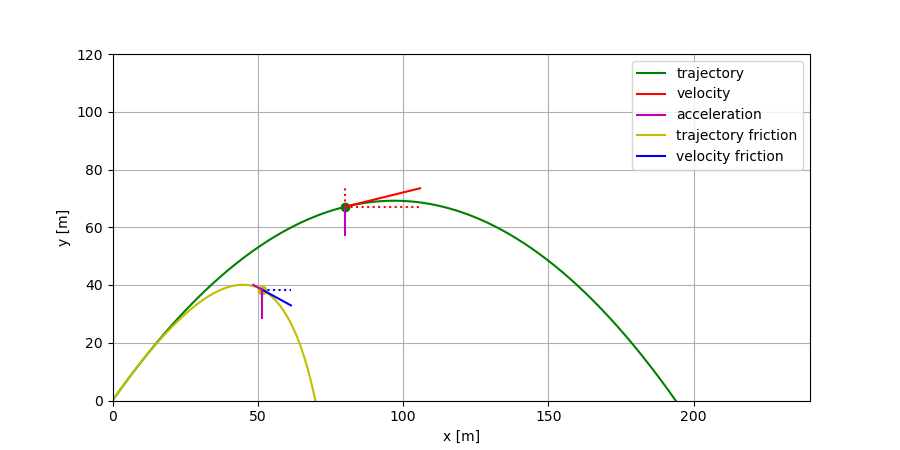

interactive(children=(IntSlider(value=35, description='$v_0$ [m/s]:', max=80), IntSlider(value=60, description…

In [10]:
# set up plot
fig, ax = plt.subplots(figsize=(9, 4.5))
ax.set_ylim([0, 120])
ax.set_xlim([0, 240])
ax.grid(True)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

ltra, =ax.plot(1,1, color='g',label='trajectory')
lpos, =ax.plot(1,1,'o', color='g')
lvel, =ax.plot(1,1, color='r',label='velocity')
lvelx, =ax.plot(1,1, color='r',linestyle=':')
lvely, =ax.plot(1,1, color='r',linestyle=':')
laccg, = ax.plot(1,1, color='m',label='acceleration')

lftra, =ax.plot(1,1, color='y',label='trajectory friction')
lfpos, =ax.plot(1,1,'o', color='y')
lfvel, =ax.plot(1,1, color='b',label='velocity friction')
lfvelx, =ax.plot(1,1, color='b',linestyle=':')
lfvely, =ax.plot(1,1, color='b',linestyle=':')
lfaccg, = ax.plot(1,1, color='m')
lfaccf, = ax.plot(1,1, color='m')

ax.legend(loc='upper right')

widgets.interact(update_b, \
         v_0=widgets.IntSlider(min=0,max=80,step=1,value=35, description='$v_0$ [m/s]:'), \
         alpha=widgets.IntSlider(min=0,max=90,step=1,value=60, description='$\\alpha$ [grad]:'), \
         lamb=widgets.FloatSlider(min=0.00001,max=1,step=0.001,value=0., description='$\\lambda$ [-]:'), \
         tt=widgets.FloatSlider(min=0,max=10,step=0.01,value=0,description='time [s]:'));